In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam

In [15]:
data = pd.read_csv('../datasets/bp/total.csv', index_col=0)

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
# MinMaxScaling 실행
minmaxscaler = MinMaxScaler()
scaled_data = minmaxscaler.fit_transform(data[['검진 시 연령', '수축기혈압']])
print(scaled_data[:6])
print(scaled_data.shape)

[[0.28888889 0.5       ]
 [0.31111111 0.375     ]
 [0.33333333 0.375     ]
 [0.35555556 0.55      ]
 [0.37777778 0.5875    ]
 [0.4        0.6       ]]
(1068, 2)


In [18]:
sequence_X = []
sequence_Y = []
for i in range(0, len(scaled_data) - 5):
    _x = scaled_data[i : i + 5]
    _y = scaled_data[i + 5][1]
    sequence_X.append(_x)
    sequence_Y.append(_y)

In [19]:
sequence_X = np.array(sequence_X)
sequence_Y = np.array(sequence_Y)
print(sequence_X.shape)
print(sequence_Y.shape)

(1063, 5, 2)
(1063,)


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(sequence_X, sequence_Y, test_size = 0.2, random_state = 77)
X_train.shape, X_test.shape, Y_train.shape

((850, 5, 2), (213, 5, 2), (850,))

In [22]:
model = Sequential()
model.add(LSTM(50, input_shape= (X_train.shape[1], X_train.shape[2]), activation= 'tanh'))
model.add(Flatten())
model.add(Dense(1))
model.compile(loss='mse', optimizer= 'adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                10600     
_________________________________________________________________
flatten (Flatten)            (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 10,651
Trainable params: 10,651
Non-trainable params: 0
_________________________________________________________________


In [23]:
fit_hist = model.fit(X_train, Y_train, epochs = 500, validation_data= (X_test, Y_test), shuffle= False)

Train on 850 samples, validate on 213 samples
Epoch 1/500
850/850 [==============================] - 4s 5ms/sample - loss: 0.0424 - val_loss: 0.0226
Epoch 2/500
850/850 [==============================] - 0s 223us/sample - loss: 0.0226 - val_loss: 0.0209
Epoch 3/500
850/850 [==============================] - 0s 151us/sample - loss: 0.0204 - val_loss: 0.0202
Epoch 4/500
850/850 [==============================] - 0s 221us/sample - loss: 0.0192 - val_loss: 0.0200
Epoch 5/500
850/850 [==============================] - 0s 197us/sample - loss: 0.0188 - val_loss: 0.0202
Epoch 6/500
850/850 [==============================] - 0s 143us/sample - loss: 0.0186 - val_loss: 0.0202
Epoch 7/500
850/850 [==============================] - 0s 160us/sample - loss: 0.0186 - val_loss: 0.0202
Epoch 8/500
850/850 [==============================] - 0s 165us/sample - loss: 0.0185 - val_loss: 0.0201
Epoch 9/500
850/850 [==============================] - 0s 168us/sample - loss: 0.0184 - val_loss: 0.0200
Epoch 10/50

Epoch 78/500
850/850 [==============================] - 0s 214us/sample - loss: 0.0177 - val_loss: 0.0191
Epoch 79/500
850/850 [==============================] - 0s 189us/sample - loss: 0.0177 - val_loss: 0.0191
Epoch 80/500
850/850 [==============================] - 0s 137us/sample - loss: 0.0177 - val_loss: 0.0191
Epoch 81/500
850/850 [==============================] - 0s 135us/sample - loss: 0.0177 - val_loss: 0.0191
Epoch 82/500
850/850 [==============================] - 0s 135us/sample - loss: 0.0177 - val_loss: 0.0191
Epoch 83/500
850/850 [==============================] - 0s 140us/sample - loss: 0.0177 - val_loss: 0.0191
Epoch 84/500
850/850 [==============================] - 0s 142us/sample - loss: 0.0177 - val_loss: 0.0191
Epoch 85/500
850/850 [==============================] - 0s 157us/sample - loss: 0.0177 - val_loss: 0.0191
Epoch 86/500
850/850 [==============================] - 0s 141us/sample - loss: 0.0177 - val_loss: 0.0191
Epoch 87/500
850/850 [========================

Epoch 155/500
850/850 [==============================] - 0s 137us/sample - loss: 0.0174 - val_loss: 0.0195
Epoch 156/500
850/850 [==============================] - 0s 136us/sample - loss: 0.0174 - val_loss: 0.0195
Epoch 157/500
850/850 [==============================] - 0s 134us/sample - loss: 0.0174 - val_loss: 0.0195
Epoch 158/500
850/850 [==============================] - 0s 148us/sample - loss: 0.0174 - val_loss: 0.0195
Epoch 159/500
850/850 [==============================] - 0s 137us/sample - loss: 0.0174 - val_loss: 0.0195
Epoch 160/500
850/850 [==============================] - 0s 136us/sample - loss: 0.0174 - val_loss: 0.0196
Epoch 161/500
850/850 [==============================] - 0s 176us/sample - loss: 0.0174 - val_loss: 0.0196
Epoch 162/500
850/850 [==============================] - 0s 217us/sample - loss: 0.0174 - val_loss: 0.0196
Epoch 163/500
850/850 [==============================] - 0s 222us/sample - loss: 0.0174 - val_loss: 0.0196
Epoch 164/500
850/850 [==============

850/850 [==============================] - 0s 138us/sample - loss: 0.0164 - val_loss: 0.0207
Epoch 308/500
850/850 [==============================] - 0s 135us/sample - loss: 0.0164 - val_loss: 0.0207
Epoch 309/500
850/850 [==============================] - 0s 135us/sample - loss: 0.0164 - val_loss: 0.0207
Epoch 310/500
850/850 [==============================] - 0s 133us/sample - loss: 0.0164 - val_loss: 0.0208
Epoch 311/500
850/850 [==============================] - 0s 134us/sample - loss: 0.0164 - val_loss: 0.0208
Epoch 312/500
850/850 [==============================] - 0s 137us/sample - loss: 0.0164 - val_loss: 0.0208
Epoch 313/500
850/850 [==============================] - 0s 136us/sample - loss: 0.0164 - val_loss: 0.0208
Epoch 314/500
850/850 [==============================] - 0s 136us/sample - loss: 0.0164 - val_loss: 0.0208
Epoch 315/500
850/850 [==============================] - 0s 136us/sample - loss: 0.0163 - val_loss: 0.0209
Epoch 316/500
850/850 [============================

850/850 [==============================] - 0s 141us/sample - loss: 0.0150 - val_loss: 0.0227
Epoch 460/500
850/850 [==============================] - 0s 144us/sample - loss: 0.0150 - val_loss: 0.0227
Epoch 461/500
850/850 [==============================] - 0s 141us/sample - loss: 0.0150 - val_loss: 0.0227
Epoch 462/500
850/850 [==============================] - 0s 145us/sample - loss: 0.0150 - val_loss: 0.0227
Epoch 463/500
850/850 [==============================] - 0s 142us/sample - loss: 0.0150 - val_loss: 0.0227
Epoch 464/500
850/850 [==============================] - 0s 141us/sample - loss: 0.0149 - val_loss: 0.0227
Epoch 465/500
850/850 [==============================] - 0s 149us/sample - loss: 0.0149 - val_loss: 0.0227
Epoch 466/500
850/850 [==============================] - 0s 144us/sample - loss: 0.0149 - val_loss: 0.0227
Epoch 467/500
850/850 [==============================] - 0s 144us/sample - loss: 0.0149 - val_loss: 0.0227
Epoch 468/500
850/850 [============================

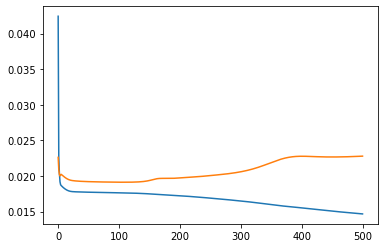

In [24]:
plt.plot(fit_hist.history['loss'])
plt.plot(fit_hist.history['val_loss'])
plt.show()

In [25]:
predict = model.predict(X_test)

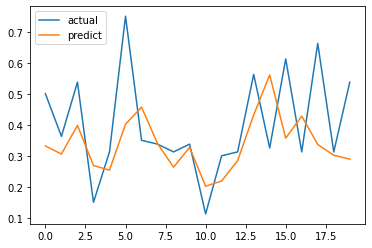

In [26]:
plt.plot(Y_test[-20:], label= 'actual')
plt.plot(predict[-20:], label= 'predict')
plt.legend()
plt.show()